### This tutorial summarizes the new features of oLIMpus compared to Zeus21.

In [1]:
import oLIMpus

from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.cm import get_cmap

Plotting style.

In [2]:
plt.rcParams.update({"text.usetex": True, "font.family": "Times new roman"}) # Use latex fonts
plt.rcParams['lines.linewidth'] = 2
colors = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) # Set the color palette as default

Define the size of the box and the number of cells we will want to use. 

Also define the minimum redshift down to which we want to compute the evolution ($z_{\rm max} = 35$ by default).

In [3]:
Lbox = 300
Ncell = 150
ZMIN = 5.0 #down to which z we compute the evolution

Set up the Cosmological parameters. 

In [4]:
#set up your parameters here
CosmoParams_input = oLIMpus.Cosmo_Parameters_Input(Rsmmin = 0.5)

#set up the CLASS cosmology
from classy import Class
ClassCosmo = Class()
ClassCosmo.compute()

ClassyCosmo = oLIMpus.runclass(CosmoParams_input) 
print('CLASS has run, we store the cosmology.')

CLASS has run, we store the cosmology.


In [5]:
CosmoParams = oLIMpus.Cosmo_Parameters(CosmoParams_input, ClassyCosmo) 
HMFintclass = oLIMpus.HMF_interpolator(CosmoParams,ClassyCosmo)
print('HMF interpolator built. This ends the cosmology part -- moving to astrophysics.')

HMF interpolator built. This ends the cosmology part -- moving to astrophysics.


Setup Astrophysical parameters. 
We create three dictionaries:
1) zeus21: lognormal approximation of the SFRD includes only linear term, no stochasticity included (orginal zeus21)
2) quad: lognormal approximation of the SFRD includes linear and quadratic terms
3) stoch: include stochasticity in the average value of the $(M_*,M_h)$ and $(\dot{M}_*,M_*)$ relations (following Nikolic et al., arXiv:2406.15237 and Gagnon-Hartman et al., arXiv:2502.20447)

In [6]:
#set up your astro parameters too, here the peak of f*(Mh) as an example
AstroParams_zeus21 = oLIMpus.Astro_Parameters(CosmoParams,STOCHASTICITY=False,second_order_SFRD=False)
AstroParams_quad = oLIMpus.Astro_Parameters(CosmoParams,STOCHASTICITY=False,second_order_SFRD=True)
AstroParams_stoch = oLIMpus.Astro_Parameters(CosmoParams,STOCHASTICITY=True,second_order_SFRD=False)

Setup Line parameters. We create four dictionaries:
1) OIII_Yang: OIII using the Yang, Lidz model (arXiv:2409.03997) with no stochasticity
2) OIII_stoch: OIII using the Yang, Lidz model with stochasticity in the $(L,\dot{M}_*)$ relation
3) Ha_Yang: Halpha using the Yang, Lidz model with no stochasticity
4) OIII_THESAN: OIII using the Thesan model (arXiv:2111.02411) with no stochasticity

They all consider resolution $R = L_{\rm box} / N_{\rm cell}$ for consistency between the modeling and the box production (in the LIM case, differently from the 21cm case, we only consider one smoothing radius instead of integrating over them).

Note that any $R < 100 $ Mpc (default value in zeus21.constants) will require non linear corrections in the 2pt function calculation.

In [7]:
print('We use R = ' + str(Lbox/Ncell) + ' Mpc.')

We use R = 2.0 Mpc.


In [8]:
OIII_Yang_input = oLIMpus.LineParams_Input(\
                 LINE = 'OIII',
                 nu_rest = 6.042e14, 
                 OBSERVABLE_LIM = 'Inu',
                 _R = Lbox/Ncell,
                 LINE_MODEL = 'Yang24',
                 sigma_LSFR = 0.)
OIII_Yang = oLIMpus.Line_Parameters(OIII_Yang_input) 

# OIII_stoch_input = oLIMpus.LineParams_Input(\
#                  LINE = 'OIII',
#                  nu_rest = 6.042e14, 
#                  OBSERVABLE_LIM = 'Inu',
#                  _R = Lbox/Ncell,
#                  LINE_MODEL = 'Yang24',
#                  sigma_LSFR = 0.5)
# OIII_stoch = oLIMpus.Line_Parameters(OIII_stoch_input) 

# Ha_Yang_input = oLIMpus.LineParams_Input(\
#                  LINE = 'Ha',
#                  nu_rest = 4.57e14, 
#                  OBSERVABLE_LIM = 'Inu',
#                  _R = Lbox/Ncell,
#                  LINE_MODEL = 'Yang24',
#                  sigma_LSFR = 0.)
# Ha_Yang = oLIMpus.Line_Parameters(Ha_Yang_input) 

# OIII_THESAN_input = oLIMpus.LineParams_Input(\
#                  LINE = 'OIII',
#                  nu_rest = 6.042e14, 
#                  OBSERVABLE_LIM = 'Inu',
#                  _R = Lbox/Ncell,
#                  LINE_MODEL = 'THESAN21',
#                  sigma_LSFR = 0.)
# OIII_THESAN = oLIMpus.Line_Parameters(OIII_THESAN_input) 


Compute the correlations for all the Line models.

In [9]:
OIII_Yang_corr = oLIMpus.Correlations_LIM(OIII_Yang, CosmoParams, ClassyCosmo)

# OIII_stoch_corr = oLIMpus.Correlations_LIM(OIII_stoch, CosmoParams, ClassyCosmo)

# Ha_Yang_corr = oLIMpus.Correlations_LIM(Ha_Yang, CosmoParams, ClassyCosmo)

# OIII_THESAN_corr = oLIMpus.Correlations_LIM(OIII_THESAN, CosmoParams, ClassyCosmo)
print('Correlation functions saved.')

Correlation functions saved.


Compute for all cases the coefficient structure needed to perform the power spectrum computation.

In [10]:
# Default zeus21 Astro
OIII_Yang_zeus21_coeff = oLIMpus.get_LIM_coefficients(CosmoParams,  AstroParams_zeus21, HMFintclass, OIII_Yang, zmin=ZMIN)

# OIII_THESAN_zeus21_coeff = oLIMpus.get_LIM_coefficients(CosmoParams, AstroParams_zeus21, HMFintclass, OIII_THESAN, zmin=ZMIN)

# Ha_Yang_zeus21_coeff = oLIMpus.get_LIM_coefficients(CosmoParams,  AstroParams_zeus21, HMFintclass, Ha_Yang, zmin=ZMIN)

In [11]:
# with quadratic term in the SFRD approx

OIII_Yang_quad_coeff = oLIMpus.get_LIM_coefficients(CosmoParams,  AstroParams_quad, HMFintclass, OIII_Yang, zmin=ZMIN)

# OIII_THESAN_quad_coeff = oLIMpus.get_LIM_coefficients(CosmoParams, AstroParams_quad, HMFintclass, OIII_THESAN, zmin=ZMIN)

# Ha_Yang_quad_coeff = oLIMpus.get_LIM_coefficients(CosmoParams,  AstroParams_quad, HMFintclass, Ha_Yang, zmin=ZMIN)

In [ ]:
# Include stochasticity
# OIII_Yang_stochSFRD_coeff = oLIMpus.get_LIM_coefficients(CosmoParams,  AstroParams_stoch, HMFintclass, OIII_Yang, zmin=ZMIN)
# 
# OIII_Yang_stoch_coeff = oLIMpus.get_LIM_coefficients(CosmoParams,  AstroParams_stoch, HMFintclass, OIII_stoch, zmin=ZMIN)

In [13]:
zlist = OIII_Yang_quad_coeff.zintegral
print('LIM and coefficients stored. Move ahead.')

LIM and coefficients stored. Move ahead.


We also compute the 21cm coefficients and correlations, which are useful for comparison.

In [ ]:
zeus21_corr = oLIMpus.Correlations(CosmoParams, ClassyCosmo)
zeus21_coeff = oLIMpus.get_T21_coefficients(CosmoParams, ClassyCosmo, AstroParams_zeus21, HMFintclass, zmin=ZMIN)
zeus21_quad = oLIMpus.get_T21_coefficients(CosmoParams, ClassyCosmo, AstroParams_quad, HMFintclass, zmin=ZMIN)
zeus21_stoch_coeff = oLIMpus.get_T21_coefficients(CosmoParams, ClassyCosmo, AstroParams_stoch, HMFintclass, zmin=ZMIN)

#### Finally, we model the luminosity intensity using the $c_1(z),c_2(z,R_0)$ coefficients and we use them to esitmate the power spectrum 

In [12]:
RSDMODE = 0 #which RSD mode you want, 0 is no RSDs (real space), 1 is spherical (as simulations usually take), 2 is mu~1 (outside the wedge, most relevant for observations)

OIII_Yang_zeus21_PSLIM = oLIMpus.Power_Spectra_LIM(CosmoParams, AstroParams_zeus21, OIII_Yang, OIII_Yang_corr, OIII_Yang_zeus21_coeff, RSD_MODE = RSDMODE)

OIII_Yang_quad_PSLIM = oLIMpus.Power_Spectra_LIM(CosmoParams, AstroParams_quad, OIII_Yang, OIII_Yang_corr,  OIII_Yang_quad_coeff, RSD_MODE = RSDMODE)

# OIII_Yang_stoch_PSLIM = oLIMpus.Power_Spectra_LIM(CosmoParams, AstroParams_stoch, OIII_Yang, OIII_Yang_corr,  OIII_Yang_stoch_coeff, RSD_MODE = RSDMODE)

# OIII_THESAN_zeus21_PSLIM = oLIMpus.Power_Spectra_LIM(CosmoParams, AstroParams_zeus21, OIII_THESAN, OIII_THESAN_corr, OIII_THESAN_zeus21_coeff, RSD_MODE = RSDMODE)

# Ha_Yang_zeus21_PSLIM = oLIMpus.Power_Spectra_LIM(CosmoParams, AstroParams_zeus21, Ha_Yang, Ha_Yang_corr,  Ha_Yang_zeus21_coeff, RSD_MODE = RSDMODE)

# OIII_Yang_stoch_PSLIM = oLIMpus.Power_Spectra_LIM(CosmoParams, AstroParams_stoch, OIII_stoch, OIII_Yang_corr, OIII_Yang_stoch_coeff, RSD_MODE = RSDMODE)


print('Computed the LIM power spectra.')

Computed the LIM power spectra.


In [ ]:
PS21_lin = oLIMpus.Power_Spectra(CosmoParams, AstroParams_zeus21, ClassyCosmo, zeus21_corr, zeus21_coeff, RSD_MODE = RSDMODE)

PS21_quad = oLIMpus.Power_Spectra(CosmoParams, AstroParams_quad, ClassyCosmo, zeus21_corr, zeus21_quad, RSD_MODE = RSDMODE)

print('Computed the 21cm power spectra.')

NameError: name 'zeus21_corr' is not defined

### We now compare the different outputs of the functions computed so far.

#### 1) SFRD : first vs quadratic approximation 

The lognormal approximation for the SFRD can be cut either at linear or quadratic order. First we show how the SFRD changes in the two cases, for three different values of $z$. Similarly, we can introduce the same approximation on the luminosity density $\rho_L$.

In [15]:
Nsigmad = 4.0 #how many sigmas we explore
Nds = 100 #how many deltas
deltatab_norm = np.linspace(-Nsigmad,Nsigmad,Nds)[np.newaxis,np.newaxis,:]

_iRnonlinear = np.arange(CosmoParams.indexmaxNL)

deltaArray = deltatab_norm * zeus21_coeff.sigmaofRtab[:, _iRnonlinear,np.newaxis] 

tildedelta = deltaArray - zeus21_coeff.gamma_II_index2D[:, _iRnonlinear,np.newaxis] * zeus21_coeff.sigmaofRtab[:, _iRnonlinear,np.newaxis]**2 / 2.

SFRD_lin = np.exp(zeus21_coeff.gamma_II_index2D[:, _iRnonlinear,np.newaxis] *deltaArray )
SFRD_quad = np.exp(zeus21_coeff.gamma_II_index2D[:, _iRnonlinear,np.newaxis] *deltaArray + zeus21_coeff.gamma2_II_index2D[:, _iRnonlinear,np.newaxis] *deltaArray**2)

rho_lin = np.exp(OIII_Yang_zeus21_coeff.gammaLIM_index[:, np.newaxis] *deltaArray )
rho_quad = np.exp(OIII_Yang_zeus21_coeff.gammaLIM_index[:,np.newaxis] *deltaArray + OIII_Yang_zeus21_coeff.gamma2_LIM_index[:,np.newaxis] *deltaArray**2)

zid = 10
zid1 = -1

R_id = 11

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.semilogy(deltaArray[zid,R_id],SFRD_lin[zid,R_id], label=r'$\rm Linear,\,z=%g$'%round(OIII_Yang_zeus21_coeff.zintegral[zid],1))
plt.semilogy(deltaArray[zid1,R_id],SFRD_lin[zid1,R_id], label=r'$\rm Linear,\,z=%g$'%round(OIII_Yang_zeus21_coeff.zintegral[zid1],1))

plt.semilogy(deltaArray[zid,R_id],SFRD_quad[zid,R_id], label=r'$\rm Quadratic,\,z=%g$'%round(OIII_Yang_zeus21_coeff.zintegral[zid],1),ls='--')
plt.semilogy(deltaArray[zid1,R_id],SFRD_quad[zid1,R_id], label=r'$\rm Quadratic,\,z=%g$'%round(OIII_Yang_zeus21_coeff.zintegral[zid1],1),ls='--')

plt.xlim(-0.8,0.8)
plt.ylim(1e-2,1e2)
plt.xlabel(r'$\delta$')
plt.ylabel(r'${\rm SFRD}(\delta_{4\,{\rm Mpc}})/\bar{\rm SFRD}$')
plt.legend()

plt.subplot(122)
plt.semilogy(deltaArray[zid,R_id],rho_lin[zid,R_id], label=r'$\rm Linear,\,z=%g$'%round(OIII_Yang_zeus21_coeff.zintegral[zid],1))
plt.semilogy(deltaArray[zid1,R_id],rho_lin[zid1,R_id], label=r'$\rm Linear,\,z=%g$'%round(OIII_Yang_zeus21_coeff.zintegral[zid1],1))
plt.semilogy(deltaArray[zid,R_id],rho_quad[zid,R_id], label=r'$\rm Quadratic,\,z=%g$'%round(OIII_Yang_zeus21_coeff.zintegral[zid],1),ls='--')
plt.semilogy(deltaArray[zid1,R_id],rho_quad[zid1,R_id], label=r'$\rm Quadratic,\,z=%g$'%round(OIII_Yang_zeus21_coeff.zintegral[zid1],1),ls='--')
plt.legend()

plt.xlim(-0.8,0.8)
plt.ylim(1e-2,1e2)
plt.xlabel(r'$\delta$')
plt.ylabel(r'${\rho}_L(\delta_{4\,{\rm Mpc}})/\bar{\rho}_L$')

NameError: name 'zeus21_coeff' is not defined

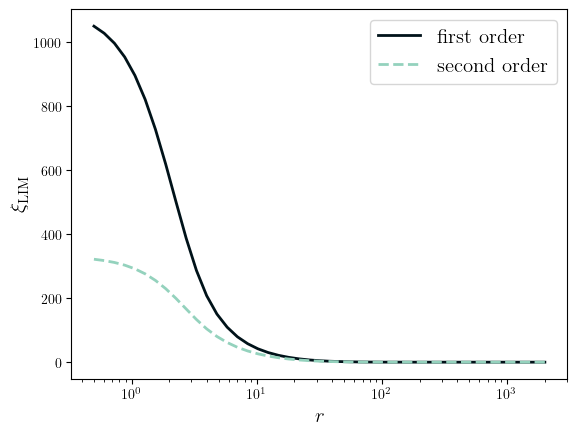

In [13]:
plt.semilogx(OIII_Yang_zeus21_PSLIM._r_CF, OIII_Yang_zeus21_PSLIM._xiR0_LIM[0,:], label = 'first order',ls='-')
plt.semilogx(OIII_Yang_quad_PSLIM._r_CF,( OIII_Yang_quad_PSLIM._xiR0_LIM[0,:]), label = 'second order',ls='--',color=colors[3])
plt.xlabel(r'$r$',fontsize=15)
plt.ylabel(r'$\xi_{\rm LIM}$',fontsize=15)
plt.legend(fontsize=15)

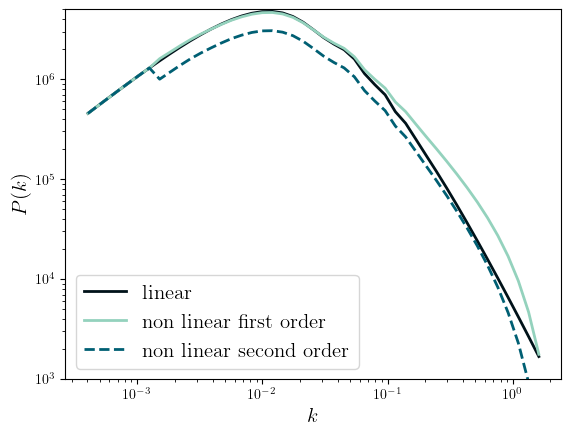

In [13]:
plt.loglog(OIII_Yang_zeus21_PSLIM.klist_PS, OIII_Yang_zeus21_PSLIM._Pk_LIM_lin[0,:], label = 'linear',ls='-')
plt.loglog(OIII_Yang_zeus21_PSLIM.klist_PS, OIII_Yang_zeus21_PSLIM._Pk_LIM[0,:], label = 'non linear first order',ls='-',color=colors[3])
plt.loglog(OIII_Yang_quad_PSLIM.klist_PS, OIII_Yang_quad_PSLIM._Pk_LIM[0,:], label = 'non linear second order',ls='--',)
#plt.loglog(OIII_Yang_quad_PSLIM.klist_PS, OIII_Yang_quad_PSLIM._Pk_deltaLIM[0,:], label = 'non linear second order',ls='--',)
plt.xlabel(r'$k$',fontsize=15)
plt.ylim(1e3,5e6)
plt.ylabel(r'$P(k)$',fontsize=15)
plt.legend(fontsize=15)

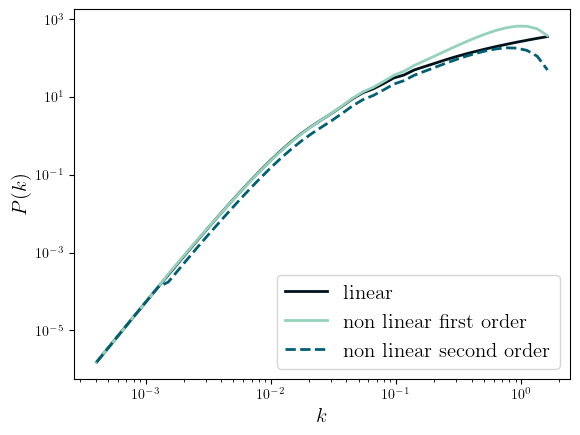

In [14]:
plt.loglog(OIII_Yang_zeus21_PSLIM.klist_PS, OIII_Yang_zeus21_PSLIM.Deltasq_LIM_lin[0,:], label = 'linear',ls='-')
plt.loglog(OIII_Yang_zeus21_PSLIM.klist_PS, OIII_Yang_zeus21_PSLIM.Deltasq_LIM[0,:], label = 'non linear first order',ls='-',color=colors[3])
plt.loglog(OIII_Yang_quad_PSLIM.klist_PS, OIII_Yang_quad_PSLIM.Deltasq_LIM[0,:], label = 'non linear second order',ls='--',)
plt.xlabel(r'$k$',fontsize=15)
#plt.ylim(1e3,5e6)
plt.ylabel(r'$P(k)$',fontsize=15)
plt.legend(fontsize=15)

#### 2) SFR : with and without stochasticity

The standard Zeus21 consider the $\rm SFRD$ from Gallumi and it introduces a deterministic relation between this quantity and $M_h$, such that 

${\rm SFRD} [M_\odot/{\rm yr }/{\rm Mpc}^3] = \int_{M_h^{\rm min}}^{M_h^{\rm max}}d\log_{10}M_h M_h\dfrac{dn}{dM_h}\dot{M}_*(M_h)$

where 

$\dot{M_*}=\dfrac{dM_h}{dt}f_*f_{\rm duty}$

We follow arXiv:2406.15237 to introduce the $\dot{M}_* - M_* - M_h$ relations. We define

${\rm SFRD} = \int_{M_h^{\rm min}}^{M_h^{\rm max}}d\log_{10}M_h \dfrac{dn}{dM_h}M_h\int_{1}^{10^{15}} \dfrac{dM_*}{\log(10)M_*} p(\log_{10}M_*|M_h)\int_{10^{-12}}^{10^4} \dfrac{d\dot{M}_*}{\log(10)\dot{M}_*}p(\log_{10}\dot{M}_*|M_*)\dot{M}_*$

where

$p(\dot{M}_*|M_*) = \dfrac{1}{\sigma_{\rm SFR}\sqrt{2\pi}}\exp\left(-\dfrac{(\log_{10}\dot{M}_*-\log_{10}\mu_{\rm SFR})^2}{2\sigma_{\rm SFR}^2}\right)$

$\mu_{\rm SFR}=\dfrac{M_*}{M_h}\dfrac{dM_h}{dt},\quad\sigma_{\rm SFR}={\rm max}\left[0.19, -0.12\left(\dfrac{M_*}{10^{10}}+0.19\right)\right]$

$p(M_*|M_h) = \dfrac{1}{\sigma_{M_*}\sqrt{2\pi}}\exp\left(-\dfrac{(\log_{10}{M}_*-\log_{10}\mu_{M_*})^2}{2\sigma_{M_*}^2}\right)$

$\mu_{M_*}=M_hf_*f_{\rm duty},\quad\sigma_{M_*}=0.3$

The values of $\mu$ and $\sigma$ are taken from arXiv:2502.20447 and adapted to the SFR model that Zeus21 uses.

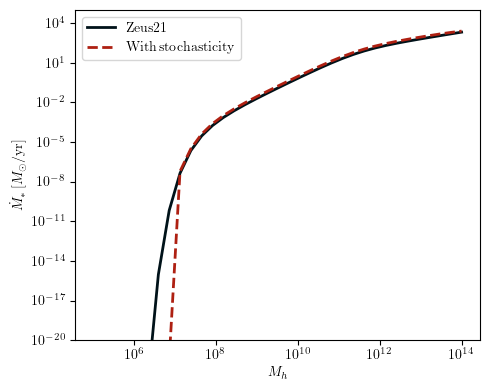

In [19]:
# First, plot the SFR with and without stochasticity
# This is the "full" SFRD so there is no difference in the linear / quadratic cases

SFR = oLIMpus.sfrd.SFR_II(AstroParams_zeus21,CosmoParams,HMFintclass,HMFintclass.Mhtab[np.newaxis,:],np.array((10.,11))[:,np.newaxis],0.)

SFR_stoch = oLIMpus.sfrd.SFR_II(AstroParams_stoch,CosmoParams,HMFintclass,HMFintclass.Mhtab[np.newaxis,:],np.array((10.,11))[:,np.newaxis],0.)

plt.figure(figsize=(5,4))

plt.loglog(HMFintclass.Mhtab,SFR[0],label=r'$\rm Zeus21$')
plt.loglog(HMFintclass.Mhtab,SFR_stoch[0],label=r'$\rm With\,stochasticity$',c=colors[-2],ls='--')

plt.xlabel(r'$M_h$')
plt.ylabel(r'$\dot{M}_*\,[M_\odot/{\rm yr}]$')
plt.legend()
plt.ylim(1e-20,1e5)

plt.tight_layout()

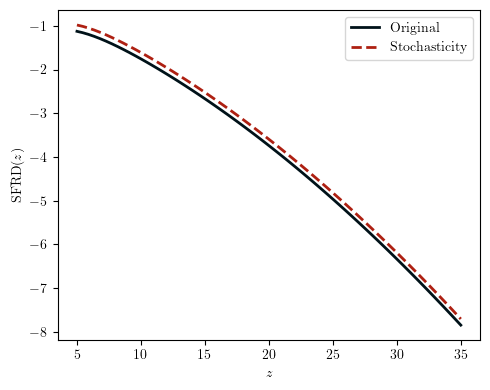

In [20]:
# and how this propagates to the average SFRD

bar_SFRD = zeus21_coeff.SFRDbar2D_II
bar_SFRD_stoch = zeus21_stoch_coeff.SFRDbar2D_II

plt.figure(figsize=(5,4))

plt.plot(zeus21_coeff.zintegral,np.log10(bar_SFRD[:,0]),label=r'$\rm Original$')
plt.plot(zeus21_coeff.zintegral,np.log10(bar_SFRD_stoch[:,0]),label=r'$\rm Stochasticity$',c=colors[-2],ls='--')

plt.xlabel(r'$z$')
plt.ylabel(r'$\bar{\rm SFRD}(z)$')
plt.legend()
plt.tight_layout()

#### 3) Line emission : Yang vs THESAN

We compare the line luminosity in the OIII Yang, Ha Yang and OIII THESAN models.

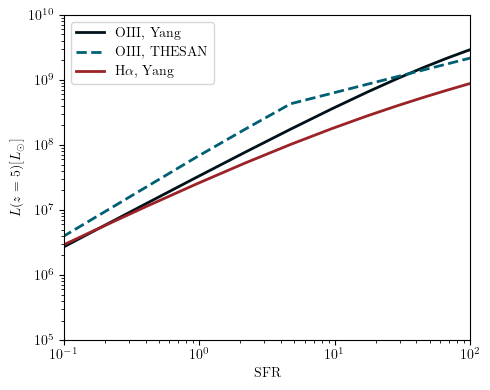

In [21]:
sfr_vals = oLIMpus.sfrd.SFR_II(AstroParams_zeus21, CosmoParams, HMFintclass, HMFintclass.Mhtab, 5., 0.)

L_OIII_Yang = oLIMpus.LIM.LineLuminosity(sfr_vals,OIII_Yang,AstroParams_zeus21,CosmoParams,HMFintclass,HMFintclass.Mhtab,5.)
L_OIII_THESAN = oLIMpus.LIM.LineLuminosity(sfr_vals,OIII_THESAN,AstroParams_zeus21,CosmoParams,HMFintclass,HMFintclass.Mhtab,5.)
L_Ha_Yang = oLIMpus.LIM.LineLuminosity(sfr_vals,Ha_Yang,AstroParams_zeus21,CosmoParams,HMFintclass,HMFintclass.Mhtab,5.)

plt.figure(figsize=(5,4))
plt.loglog(sfr_vals,L_OIII_Yang,label=r'$\rm OIII,\,Yang$')
plt.loglog(sfr_vals,L_OIII_THESAN,label=r'$\rm OIII,\,THESAN$',ls='--')
plt.loglog(sfr_vals,L_Ha_Yang,label=r'$\rm H\alpha,\,Yang$',color=colors[-1])
plt.xlabel(r'$\rm SFR$')
plt.ylabel(r'$L(z = 5) [L_\odot]$')

plt.xlim(1e-1,1e2)
plt.ylim(1e5,1e10)
plt.legend()
plt.tight_layout()

Without stochasticity, the average luminosity density is defined as 

$\bar{\rho}_L = \int_{M_h^{\rm min}}^{M_h^{\rm max}}d\log_{10}M_h M_h\dfrac{dn}{dM_h}L(\dot{M}_*(M_h))$ 

where $L(\dot{M}_*(M_h))$ is the luminosity-to-SFR relation discussed in the previous point.

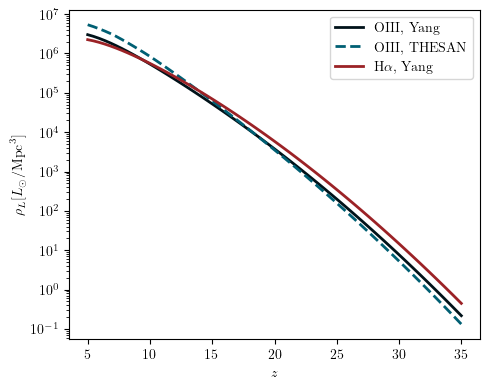

In [22]:
# This relies on the "full" SFRD so there is no difference in the linear / quadratic cases

plt.figure(figsize=(5,4))
plt.semilogy(OIII_Yang_zeus21_coeff.zGreaterMatrix,OIII_Yang_zeus21_coeff.rhoLbar,label=r'$\rm OIII,\,Yang$')
plt.semilogy(OIII_THESAN_zeus21_coeff.zGreaterMatrix,OIII_THESAN_zeus21_coeff.rhoLbar,label=r'$\rm OIII,\,THESAN$',ls='--')
plt.semilogy(Ha_Yang_zeus21_coeff.zGreaterMatrix,Ha_Yang_zeus21_coeff.rhoLbar,label=r'$\rm H\alpha,\,Yang$',color=colors[-1])
plt.xlabel(r'$z$')
plt.ylabel(r'$\rho_L [L_\odot/{\rm Mpc}^3]$')

plt.legend()
plt.tight_layout()

The average luminosity density is then converted into observed intensity

$\bar{I}_\nu [L_\odot {\rm/cm^2/sr/Hz}] \,= \dfrac{c}{4\pi H(z)\nu_{\rm rest}}{\rho}_L(z)$

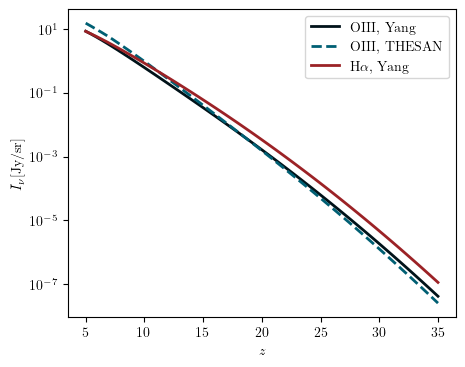

In [23]:
plt.figure(figsize=(5,4))
plt.semilogy(OIII_Yang_zeus21_coeff.zGreaterMatrix,OIII_Yang_zeus21_coeff.Inu_avg,label=r'$\rm OIII,\,Yang$')
plt.semilogy(OIII_THESAN_zeus21_coeff.zGreaterMatrix,OIII_THESAN_zeus21_coeff.Inu_avg,label=r'$\rm OIII,\,THESAN$',ls='--')
plt.semilogy(Ha_Yang_zeus21_coeff.zGreaterMatrix,Ha_Yang_zeus21_coeff.Inu_avg,label=r'$\rm H\alpha,\,Yang$',color=colors[-1])
plt.xlabel(r'$z$')
plt.ylabel(r'$\bar{I}_{\nu} [{\rm Jy/sr}]$')
plt.legend()

#### 4) Line emission : with and without stochasticity

We define a lognormal distribution to introduce stochasticity in the $L-\dot{M}_*$ relation. Therefore we have

$\bar{\rho}_L = \int_{M_h^{\rm min}}^{M_h^{\rm max}}d\log_{10}M_h M_h\dfrac{dn}{dM_h}\int dL' \dfrac{p(\log_{10}L'|\dot{M}_*)}{\log(10)L'}L'$

where 

$p(\log_{10}L'|\dot{M}_*)=\dfrac{1}{\sqrt{2\pi}\sigma_L}\exp\left(-\dfrac{(\log_{10}L-\log_{10}\mu_L)^2}{2\sigma_L^2}\right)$

and the average is set to $\mu_L = L$, namely to the original relation. The value of $\sigma_L$ is given as input. 

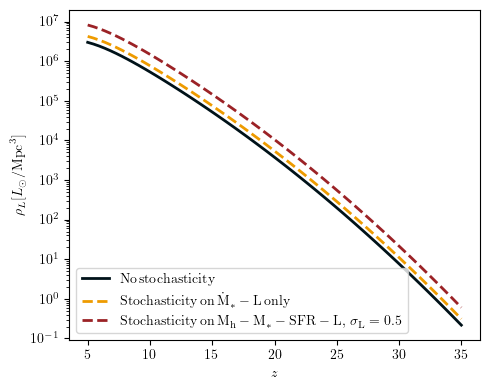

In [24]:
# we plot the effect of the stochasticity (only on the SFR-M*-Mh relations or also on the L-SFR relation) when considering the OIII line

plt.figure(figsize=(5,4))
plt.semilogy(OIII_Yang_zeus21_coeff.zGreaterMatrix,OIII_Yang_zeus21_coeff.rhoLbar,'-',label=r'$\rm No\,stochasticity$')
plt.semilogy(OIII_Yang_stochSFRD_coeff.zGreaterMatrix,OIII_Yang_stochSFRD_coeff.rhoLbar,'--',label=r'$\rm Stochasticity\,on\,\dot{M}_*-L\,only$',color=colors[5])
plt.semilogy(OIII_Yang_stoch_coeff.zGreaterMatrix,OIII_Yang_stoch_coeff.rhoLbar,'--',label=r'$\rm Stochasticity\,on\,M_h-M_*-SFR-L,\,\sigma_L=0.5$',color=colors[-1])
plt.xlabel(r'$z$')
plt.ylabel(r'$\rho_L [L_\odot/{\rm Mpc}^3]$')
plt.legend(loc=3)
plt.tight_layout()

### Let's now look at the power spectrum 

First, let's compare the 21cm and OIII power spectra using linear and quadratic SFRD approximations.

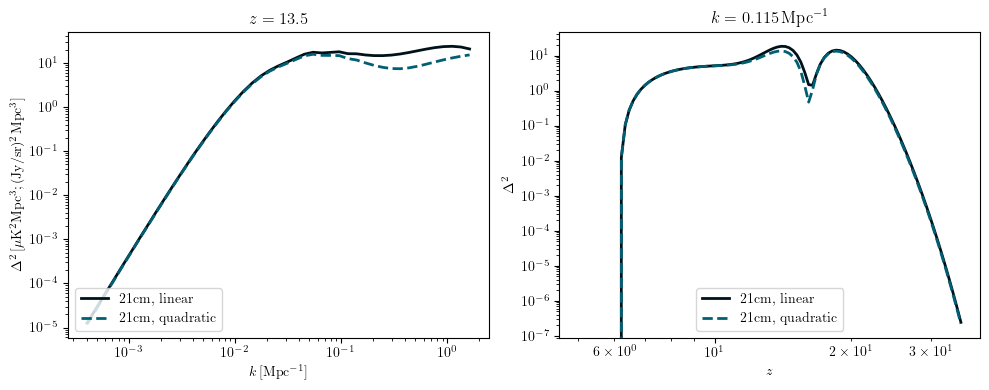

In [39]:
plt.figure(figsize=(10,4))

_iz = 50
_ik = 30

plt.subplot(121)
#plt.loglog(OIII_Yang_zeus21_PSLIM.klist_PS,OIII_Yang_zeus21_PSLIM.Deltasq_LIM[_iz],'-',label=r'$\rm OIII\,Yang,\,linear$')
plt.loglog(PS21_lin.klist_PS,PS21_lin.Deltasq_T21[_iz],'-',label=r'$\rm 21cm,\,linear$')
#plt.loglog(OIII_Yang_quad_PSLIM.klist_PS,OIII_Yang_quad_PSLIM.Deltasq_LIM[_iz],label=r'$\rm OIII\,Yang,\,quadratic$',ls='--')
plt.loglog(PS21_quad.klist_PS,PS21_quad.Deltasq_T21[_iz],label=r'$\rm 21cm,\,quadratic$',ls='--')

plt.title(r'$z=%g$'%round(zeus21_coeff.zintegral[_iz],1))      
plt.xlabel(r'$k\,[{\rm Mpc^{-1}}]$')
plt.ylabel(r'$\Delta^2\,[\mu{\rm K^2Mpc^{3}};{\rm (Jy/sr)^2Mpc^3}]$')
plt.legend(loc=3)

plt.subplot(122)
#plt.loglog(OIII_Yang_zeus21_coeff.zintegral,OIII_Yang_zeus21_PSLIM.Deltasq_LIM[:,_ik],'-',label=r'$\rm OIII\,Yang,\,linear$')
plt.loglog(zeus21_coeff.zintegral,PS21_lin.Deltasq_T21[:,_ik],'-',label=r'$\rm 21cm,\,linear$')
#plt.loglog(OIII_Yang_zeus21_coeff.zintegral,OIII_Yang_quad_PSLIM.Deltasq_LIM[:,_ik],label=r'$\rm OIII\,Yang,\,quadratic$',ls='--')
plt.loglog(zeus21_coeff.zintegral,PS21_quad.Deltasq_T21[:,_ik],label=r'$\rm 21cm,\,quadratic$',ls='--')

plt.title(r'$k=%g\,{\rm Mpc}^{-1}$'%round(OIII_Yang_quad_PSLIM.klist_PS[_ik],3))      
plt.xlabel(r'$z$')
plt.ylabel(r'$\Delta^2$')
plt.legend(loc=3)

plt.tight_layout()

plt.legend()

Then we compute thr different LIM power spectra.

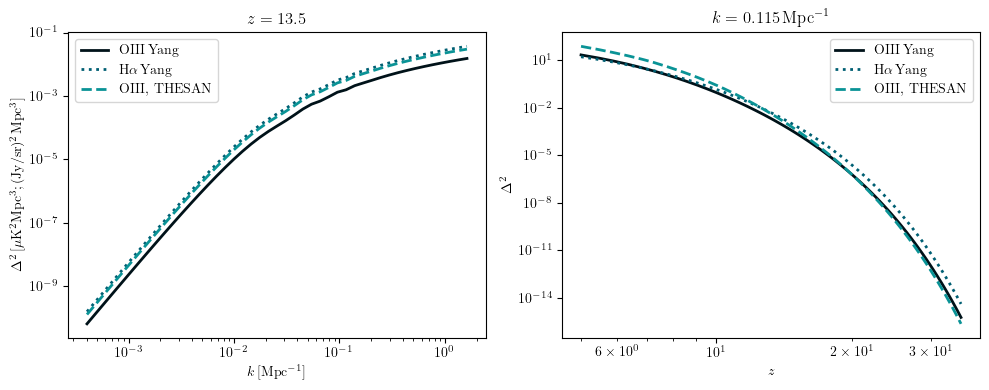

In [27]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.loglog(OIII_Yang_zeus21_PSLIM.klist_PS,OIII_Yang_zeus21_PSLIM.Deltasq_LIM[_iz],'-',label=r'$\rm OIII\,Yang$')
plt.loglog(Ha_Yang_zeus21_PSLIM.klist_PS,Ha_Yang_zeus21_PSLIM.Deltasq_LIM[_iz],ls=':',label=r'$\rm H\alpha\,Yang$')
plt.loglog(OIII_THESAN_zeus21_PSLIM.klist_PS,OIII_THESAN_zeus21_PSLIM.Deltasq_LIM[_iz],label=r'$\rm OIII,\,THESAN$',ls='--')

plt.title(r'$z=%g$'%round(zeus21_coeff.zintegral[_iz],1))      
plt.xlabel(r'$k\,[{\rm Mpc^{-1}}]$')
plt.ylabel(r'$\Delta^2\,[\mu{\rm K^2Mpc^{3}};{\rm (Jy/sr)^2Mpc^3}]$')
plt.legend(loc=2)

plt.subplot(122)
plt.loglog(OIII_Yang_zeus21_coeff.zintegral,OIII_Yang_zeus21_PSLIM.Deltasq_LIM[:,_ik],'-',label=r'$\rm OIII\,Yang$')
plt.loglog(OIII_Yang_zeus21_coeff.zintegral,Ha_Yang_zeus21_PSLIM.Deltasq_LIM[:,_ik],label=r'$\rm H\alpha\,Yang$',ls=':')
plt.loglog(OIII_Yang_zeus21_coeff.zintegral,OIII_THESAN_zeus21_PSLIM.Deltasq_LIM[:,_ik],label=r'$\rm OIII,\,THESAN$',ls='--')

plt.title(r'$k=%g\,{\rm Mpc}^{-1}$'%round(OIII_Yang_quad_PSLIM.klist_PS[_ik],3))      
plt.xlabel(r'$z$')
plt.ylabel(r'$\Delta^2$')
plt.legend(loc=3)

plt.tight_layout()

plt.legend()

Finally, with and without stochasticity.

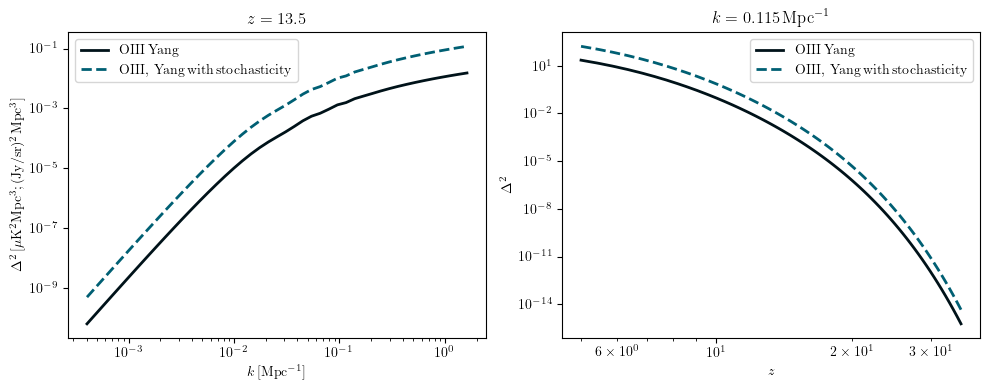

In [28]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.loglog(OIII_Yang_zeus21_PSLIM.klist_PS,OIII_Yang_zeus21_PSLIM.Deltasq_LIM[_iz],'-',label=r'$\rm OIII\,Yang$')
plt.loglog(OIII_Yang_stoch_PSLIM.klist_PS,OIII_Yang_stoch_PSLIM.Deltasq_LIM[_iz],label=r'$\rm OIII,\,Yang\,with\,stochasticity$',ls='--')

plt.title(r'$z=%g$'%round(zeus21_coeff.zintegral[_iz],1))      
plt.xlabel(r'$k\,[{\rm Mpc^{-1}}]$')
plt.ylabel(r'$\Delta^2\,[\mu{\rm K^2Mpc^{3}};{\rm (Jy/sr)^2Mpc^3}]$')
plt.legend(loc=2)

plt.subplot(122)
plt.loglog(OIII_Yang_zeus21_coeff.zintegral,OIII_Yang_zeus21_PSLIM.Deltasq_LIM[:,_ik],'-',label=r'$\rm OIII\,Yang$')
plt.loglog(OIII_Yang_zeus21_coeff.zintegral,OIII_Yang_stoch_PSLIM.Deltasq_LIM[:,_ik],label=r'$\rm OIII,\,Yang\,with\,stochasticity$',ls='--')

plt.title(r'$k=%g\,{\rm Mpc}^{-1}$'%round(OIII_Yang_quad_PSLIM.klist_PS[_ik],3))      
plt.xlabel(r'$z$')
plt.ylabel(r'$\Delta^2$')
plt.legend(loc=3)

plt.tight_layout()

plt.legend()